<a href="https://colab.research.google.com/github/RubenGres/AerialDreams/blob/main/AerialDreams_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers transformers git+https://github.com/huggingface/accelerate.git

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch

controlnet = ControlNetModel.from_pretrained("rgres/sd-controlnet-aerialdreams", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-base", controlnet=controlnet, torch_dtype=torch.float16
)

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [ ]:
# CPU offloading for faster inference times
from diffusers import UniPCMultistepScheduler
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

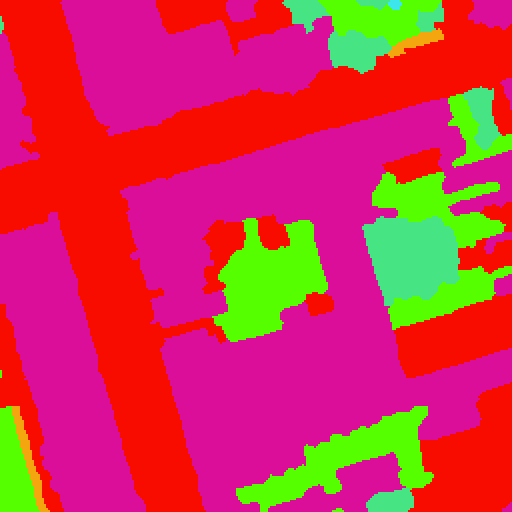

In [ ]:
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image

image = load_image("https://raw.githubusercontent.com/RubenGres/AerialDreams/main/validation/mask/MSK_076201.png")
image

  0%|          | 0/20 [00:00<?, ?it/s]

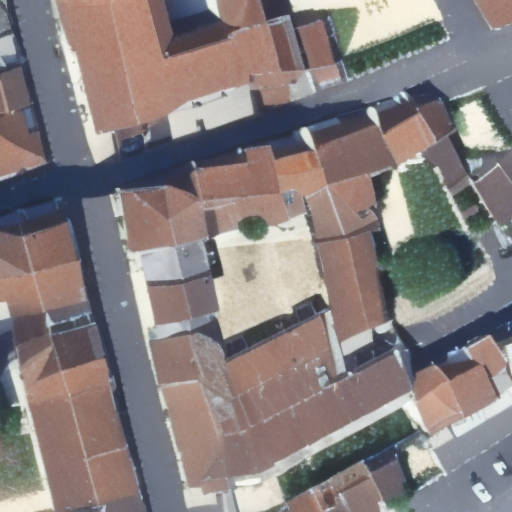

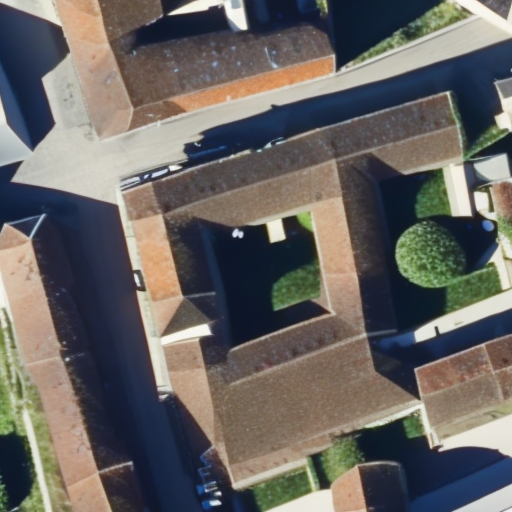

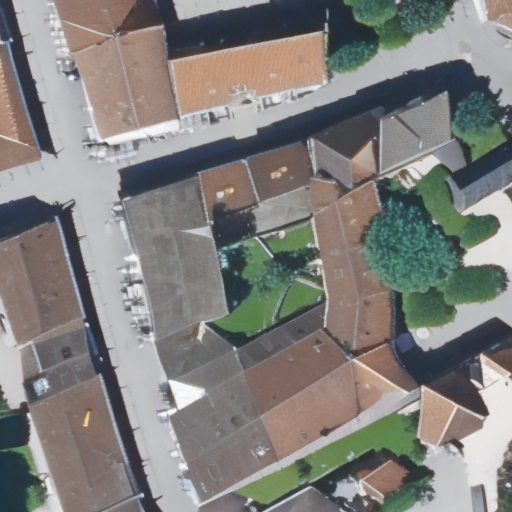

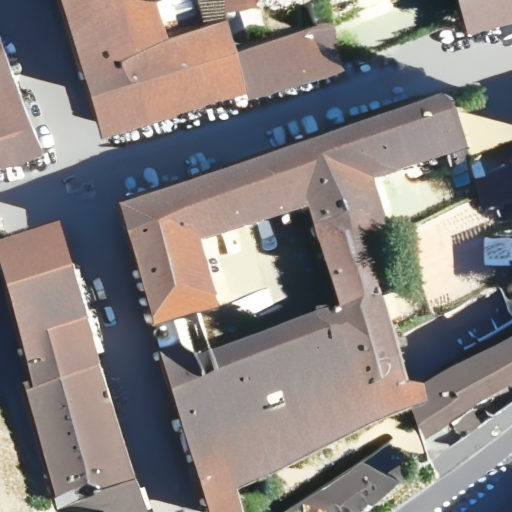

In [ ]:
prompt = "High resolution image, 4K, ultra detailed, aerial view of 31 Rue Molière, France."

generator = torch.manual_seed(0)

images = pipe(
    prompt=[prompt]*4,
    num_inference_steps=20,
    image=image
)

for img in images[0]:
  img.show()

# Stylization

Lego

  0%|          | 0/20 [00:00<?, ?it/s]

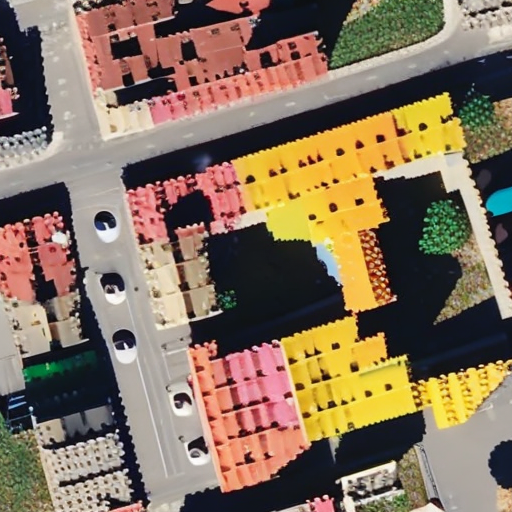

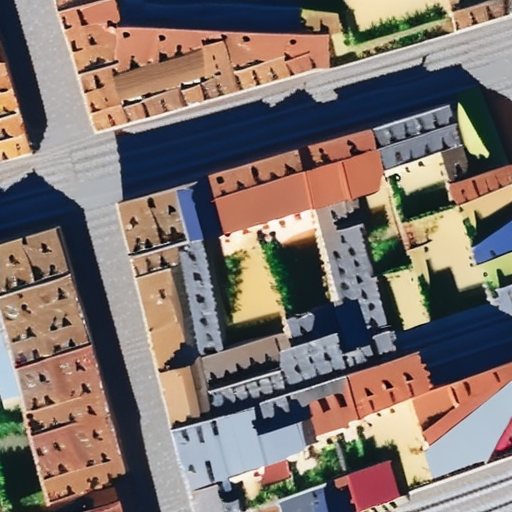

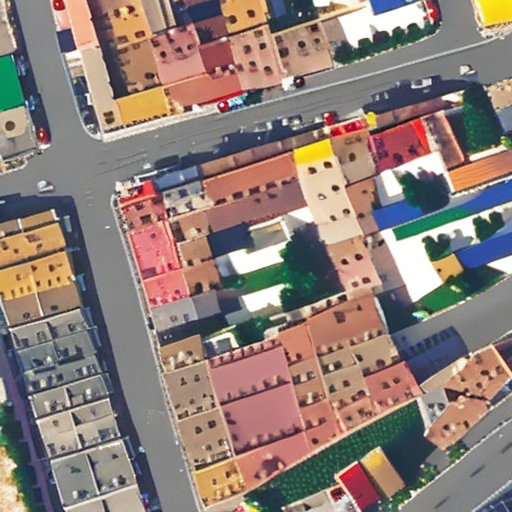

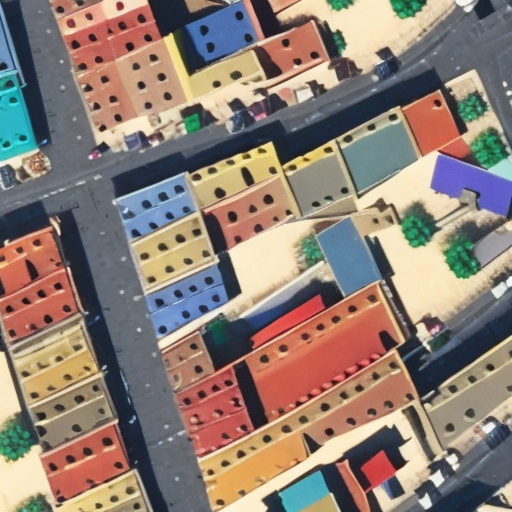

In [ ]:
prompt = "Colorful LEGO bricks, aerial view of 31 Rue Molière, France."

generator = torch.manual_seed(1)

images = pipe(
    prompt=[prompt]*4,
    num_inference_steps=20,
    image=image
)

for img in images[0]:
  img.show()

  0%|          | 0/20 [00:00<?, ?it/s]

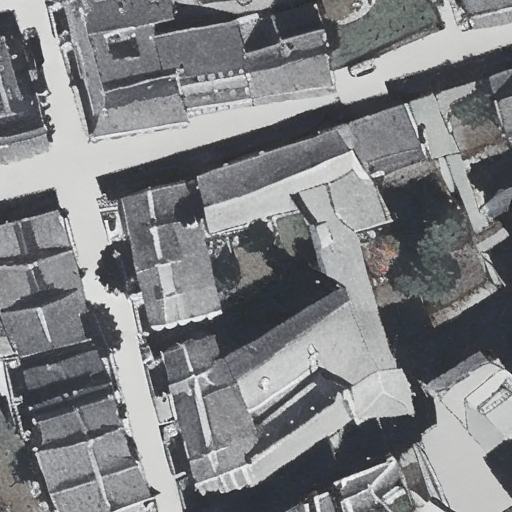

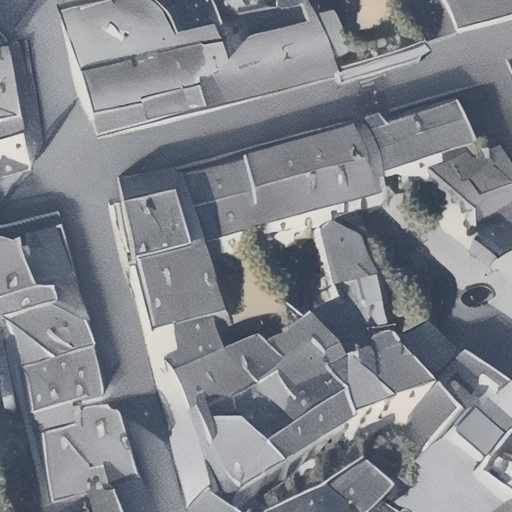

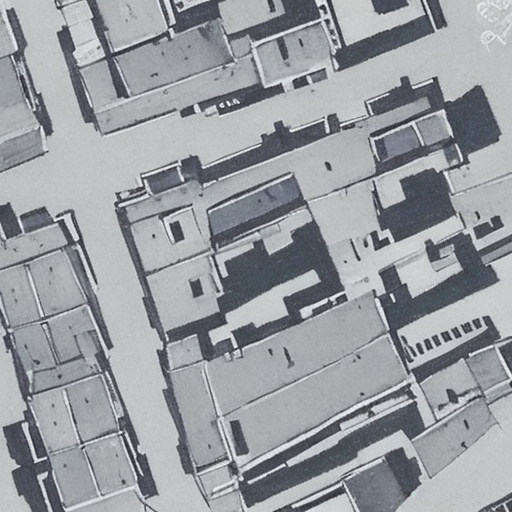

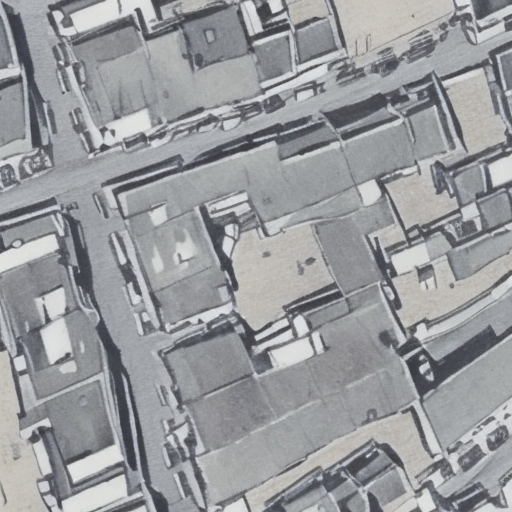

In [ ]:
prompt = "Detailed pencil sketch, black and white, aerial view of 31 Rue Molière, France."

generator = torch.manual_seed(1)

images = pipe(
    prompt=[prompt]*4,
    num_inference_steps=20,
    image=image
)

for img in images[0]:
  img.show()